# Importig libraries

In [3]:
## Importing relevant libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\prajjwal\Desktop\jp_morgan_stock_analysis\dataset\JPM_2017_2019.csv")


# Loading Dataset

In [5]:
data.index = pd.to_datetime(data.index)
data.rename(columns = {"Unnamed: 0": "Date - Time"}, inplace = True)
##print(data[['open','close']])
##data.rename(columns={'Unnamed: 0': 'Date-Time'}, inplace=True)
data

,Date - Time,open,high,low,close,volume
1970-01-01 00:00:00.000000000,2017-01-03 09:45:00+00:00,87.340,87.750,87.020,87.390,2184761.0
1970-01-01 00:00:00.000000001,2017-01-03 10:00:00+00:00,87.390,87.440,86.950,87.190,1148228.0
1970-01-01 00:00:00.000000002,2017-01-03 10:15:00+00:00,87.210,87.410,87.140,87.300,860609.0
1970-01-01 00:00:00.000000003,2017-01-03 10:30:00+00:00,87.310,87.380,87.260,87.380,481605.0
1970-01-01 00:00:00.000000004,2017-01-03 10:45:00+00:00,87.370,87.460,87.130,87.130,675950.0
...,...,...,...,...,...,...
1970-01-01 00:00:00.000019365,2019-12-31 15:00:00+00:00,138.720,138.786,138.720,138.755,137277.0
1970-01-01 00:00:00.000019366,2019-12-31 15:15:00+00:00,138.745,138.787,138.655,138.775,139979.0
1970-01-01 00:00:00.000019367,2019-12-31 15:30:00+00:00,138.760,138.930,138.704,138.910,144914.0
1970-01-01 00:00:00.000019368,2019-12-31 15:45:00+00:00,138.910,139.220,138.883,139.200,336305.0


In [6]:
## Printing the count of NAN values in DataFrame  data

print(data.isna().sum())

Date - Time    0
open           0
high           0
low            0
close          0
volume         0
dtype: int64


## Graph depicting the sum of NaN values of each features in the dataframe

Text(0, 0.5, 'Total no. of NaN values')

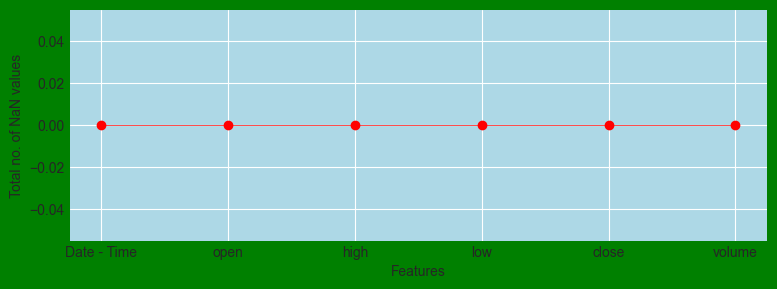

In [8]:
## Printing the graph of nan values in dataframe

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')


columns = list(data.columns)
sum_of_nans = list(data.isna().sum())

fig , ax = plt.subplots(figsize = (9,3) )

fig.set_facecolor('green')

ax.set_facecolor('lightblue')
ax.scatter(columns, sum_of_nans, color = 'red', linewidth = 1)
ax.plot(columns,sum_of_nans, color = 'red', linewidth = .5)
ax.set_xlabel('Features')
ax.set_ylabel('Total no. of NaN values')

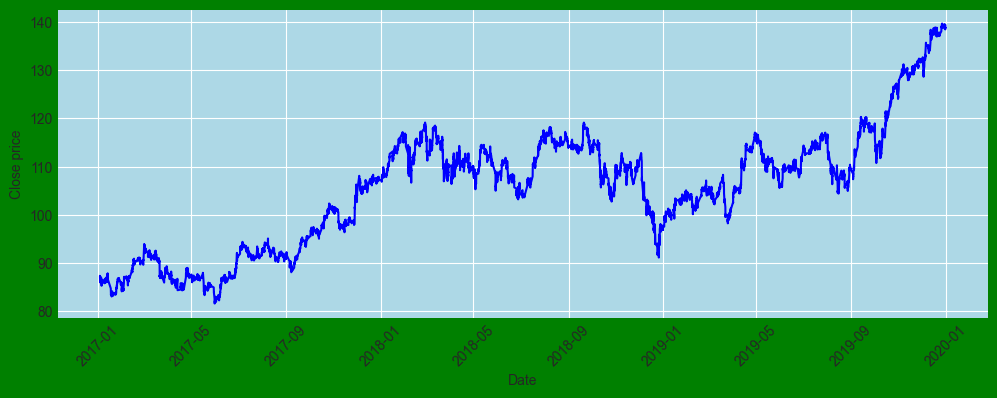

In [9]:
date = pd.to_datetime(data.index)
close = list(data.close)
fig ,ax = plt.subplots(figsize=(12,4), facecolor = 'green')
ax.plot(pd.to_datetime(data['Date - Time']),data['close'] , 'b')
ax.set_facecolor('lightblue')
ax.set_xlabel('Date')
ax.set_ylabel('Close price')
plt.xticks(rotation = 45)

plt.show()

In [10]:
## Self implemented function to calculate Signal list for the dataframe

def signal(data):
    row , col = data.shape
    dif = []
    dif.append(np.nan)
    for i in range(row-1):
        temp = (data['close'].iloc[i+1] - data['close'].iloc[i])/data['close'].iloc[i+1]
        dif.append(temp)
    
    return pd.DataFrame(dif, columns = ['signal'])

In [11]:
## Adding the signal column as indicator to buy or sell

data['signal'] = data['close'].pct_change().shift(-1)

data['signal'] = np.where(data.signal > 0, 1 , 0)

#print(data.head())

print(data[['close','signal']].head())
print(data[['close','signal']].tail())

print(data.shape)

                               close  signal
1970-01-01 00:00:00.000000000  87.39       0
1970-01-01 00:00:00.000000001  87.19       1
1970-01-01 00:00:00.000000002  87.30       1
1970-01-01 00:00:00.000000003  87.38       0
1970-01-01 00:00:00.000000004  87.13       0
                                 close  signal
1970-01-01 00:00:00.000019365  138.755       1
1970-01-01 00:00:00.000019366  138.775       1
1970-01-01 00:00:00.000019367  138.910       1
1970-01-01 00:00:00.000019368  139.200       1
1970-01-01 00:00:00.000019369  139.390       0
(19370, 7)


In [12]:
## Adding columns for percentage changes in 15 minutes and 75 minutes

data['pct_change_15'] = data.close.pct_change()
data['pct_change_45'] = data.close.pct_change(3)
data['pct_change_75'] = data.close.pct_change(5)
##data['pct_change_105'] = data.close.pct_change(7)

data.head(10)

,Date - Time,open,high,low,close,volume,signal,pct_change_15,pct_change_45,pct_change_75
1970-01-01 00:00:00.000000000,2017-01-03 09:45:00+00:00,87.34,87.75,87.02,87.39,2184761.0,0,NaN,NaN,NaN
1970-01-01 00:00:00.000000001,2017-01-03 10:00:00+00:00,87.39,87.44,86.95,87.19,1148228.0,1,-0.002289,NaN,NaN
1970-01-01 00:00:00.000000002,2017-01-03 10:15:00+00:00,87.21,87.41,87.14,87.30,860609.0,1,0.001262,NaN,NaN
1970-01-01 00:00:00.000000003,2017-01-03 10:30:00+00:00,87.31,87.38,87.26,87.38,481605.0,0,0.000916,-0.000114,NaN
1970-01-01 00:00:00.000000004,2017-01-03 10:45:00+00:00,87.37,87.46,87.13,87.13,675950.0,0,-0.002861,-0.000688,NaN
1970-01-01 00:00:00.000000005,2017-01-03 11:00:00+00:00,87.12,87.19,86.54,86.58,760492.0,0,-0.006312,-0.008247,-0.009269
1970-01-01 00:00:00.000000006,2017-01-03 11:15:00+00:00,86.57,86.63,86.40,86.49,597028.0,1,-0.001040,-0.010185,-0.008028
1970-01-01 00:00:00.000000007,2017-01-03 11:30:00+00:00,86.49,86.80,86.48,86.63,517137.0,0,0.001619,-0.005739,-0.007675
1970-01-01 00:00:00.000000008,2017-01-03 11:45:00+00:00,86.63,86.71,86.30,86.36,402327.0,1,-0.003117,-0.002541,-0.011673
1970-01-01 00:00:00.000000009,2017-01-03 12:00:00+00:00,86.35,86.48,86.26,86.49,418910.0,0,0.001505,0.000000,-0.007345


## Calculating RSI and ADX indexes

                                     rsi        adx
1970-01-01 00:00:00.000019365  48.917663  18.059900
1970-01-01 00:00:00.000019366  49.359122  18.104801
1970-01-01 00:00:00.000019367  52.255662  17.906918
1970-01-01 00:00:00.000019368  57.665344  17.283036
1970-01-01 00:00:00.000019369  60.699494  16.886426


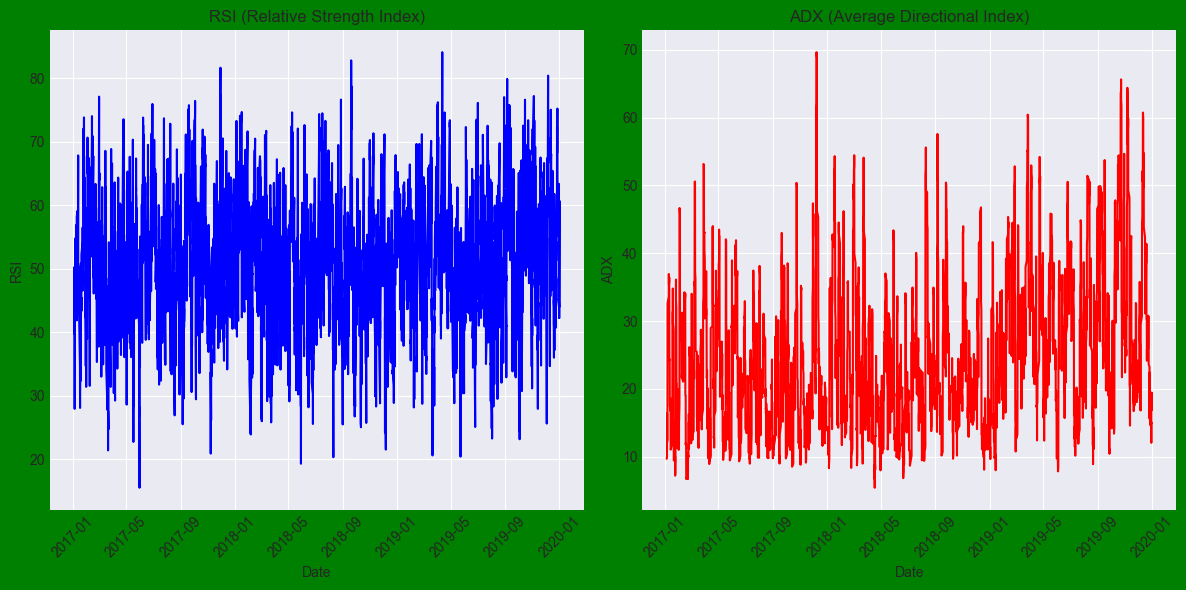

In [14]:
import talib as ta

data['rsi'] = ta.RSI(data.close.values, timeperiod = int(6.5*4))                  ## timeperiod parameter is set to default , which is 14 days for both RSI and ADX

data['adx'] = ta.ADX(data.high.values , data.low.values, data.open.values, timeperiod = int(6.5*4))

print(data[['rsi','adx']].tail())

fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns of plots, adjust figsize as needed
fig.set_facecolor('green')
# Plotting RSI on the first subplot
ax[0].plot(pd.to_datetime(pd.to_datetime(data['Date - Time'])), data['rsi'], color='blue')
ax[0].set_title('RSI (Relative Strength Index)')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('RSI')

# Plotting ADX on the second subplot
ax[1].plot(pd.to_datetime(data['Date - Time']), data['adx'], color='r')
ax[1].set_title('ADX (Average Directional Index)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('ADX')

for axis in ax:
    axis.tick_params(axis='x', rotation=45)
# Show the plots
plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

                               rsi  adx  rsi-adx
1970-01-01 00:00:00.000000000  NaN  NaN      NaN
1970-01-01 00:00:00.000000001  NaN  NaN      NaN
1970-01-01 00:00:00.000000002  NaN  NaN      NaN
1970-01-01 00:00:00.000000003  NaN  NaN      NaN
1970-01-01 00:00:00.000000004  NaN  NaN      NaN


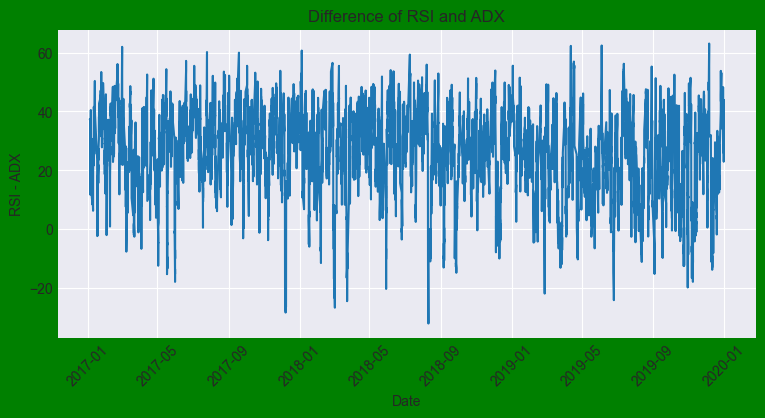

In [15]:
data['rsi-adx'] = data.rsi - data.adx
print(data[['rsi','adx', 'rsi-adx']].head())

fig, ax = plt.subplots(figsize= (9,4))

fig.set_facecolor('g')

ax.plot(pd.to_datetime(data['Date - Time']), data['rsi-adx'])

ax.set_xlabel("Date")
ax.set_ylabel("RSI - ADX")
ax.set_title('Difference of RSI and ADX')
plt.xticks(rotation = 45)

plt.show()

## Simple Moving Average and Correlation

In [17]:
data['sma'] = data.close.rolling(window = int(6.5*4)).mean()

data['corr'] = data.close.rolling( window = int(6.5*4)).corr(data.sma)

##print(data.head(50))

## Volatility over 1 day and 2 day

In [19]:
data['volatility'] = data.rolling(int(6.5*4), min_periods = int(6.5*4))['pct_change_15'].std()*100

data['volatility2'] = data.rolling(int(6.5*8), min_periods = int(6.5*8))['pct_change_75'].std()*100

data.tail()

,Date - Time,open,high,low,close,volume,signal,pct_change_15,pct_change_45,pct_change_75,rsi,adx,rsi-adx,sma,corr,volatility,volatility2
1970-01-01 00:00:00.000019365,2019-12-31 15:00:00+00:00,138.720,138.786,138.720,138.755,137277.0,1,0.000108,-0.000396,0.000108,48.917663,18.059900,30.857763,138.707846,-0.233961,0.076398,0.160096
1970-01-01 00:00:00.000019366,2019-12-31 15:15:00+00:00,138.745,138.787,138.655,138.775,139979.0,1,0.000144,-0.000756,-0.000547,49.359122,18.104801,31.254321,138.705885,-0.348533,0.073904,0.159938
1970-01-01 00:00:00.000019367,2019-12-31 15:30:00+00:00,138.760,138.930,138.704,138.910,144914.0,1,0.000973,0.001225,0.000720,52.255662,17.906918,34.348743,138.707615,-0.538080,0.076218,0.160438
1970-01-01 00:00:00.000019368,2019-12-31 15:45:00+00:00,138.910,139.220,138.883,139.200,336305.0,1,0.002088,0.003207,0.002304,57.665344,17.283036,40.382308,138.729346,-0.511921,0.078749,0.164060
1970-01-01 00:00:00.000019369,2019-12-31 16:00:00+00:00,139.195,139.480,139.140,139.390,949197.0,0,0.001365,0.004432,0.004685,60.699494,16.886426,43.813068,138.757038,-0.466739,0.082235,0.177118


# Dropping the NaN values

In [21]:
data.dropna(inplace = True)

## Creating Target and Feature Variables

In [23]:


##print(data.head())
y = data.signal.copy()

x = data[['open','high','low','close','pct_change_15','pct_change_45','pct_change_75' ,'rsi','adx','sma','corr','volatility','volatility2']].copy()

x = pd.DataFrame(x)

print(x.head(11))
print(y.head(10))

                                open   high    low  close  pct_change_15  \
1970-01-01 00:00:00.000000056  86.37  86.38  86.03  86.08      -0.003358   
1970-01-01 00:00:00.000000057  86.07  86.08  85.72  85.87      -0.002440   
1970-01-01 00:00:00.000000058  85.88  86.07  85.56  85.62      -0.002911   
1970-01-01 00:00:00.000000059  85.62  85.76  85.56  85.72       0.001168   
1970-01-01 00:00:00.000000060  85.73  86.35  85.25  85.33      -0.004550   
1970-01-01 00:00:00.000000061  85.32  85.50  85.27  85.48       0.001758   
1970-01-01 00:00:00.000000062  85.48  85.66  85.48  85.62       0.001638   
1970-01-01 00:00:00.000000063  85.62  85.79  85.61  85.66       0.000467   
1970-01-01 00:00:00.000000064  85.67  85.69  85.45  85.50      -0.001868   
1970-01-01 00:00:00.000000065  85.51  85.66  85.49  85.58       0.000936   
1970-01-01 00:00:00.000000066  85.60  85.75  85.57  85.68       0.001168   

                               pct_change_45  pct_change_75        rsi  \
1970-01-01 00

## Plotting the featues

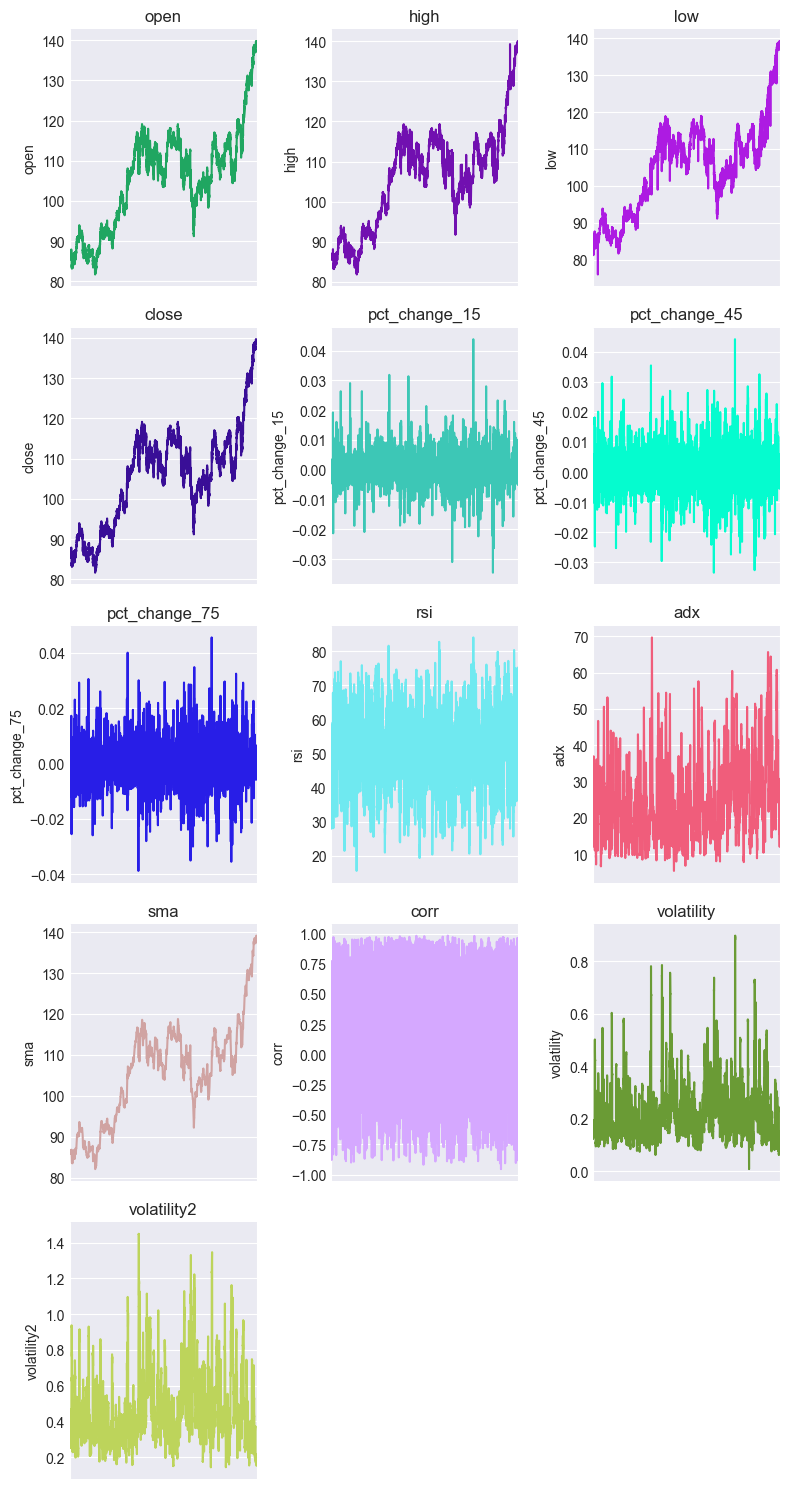

In [25]:
i = 1
rows = int(np.ceil(x.shape[1] / 3))  
for feature in x.columns: 
    plt.subplot(rows, 3, i) 
    x[feature].plot(figsize=(8, 3 * rows), color=np.random.rand(3))  
    plt.ylabel(feature)
    plt.title(feature)
    i += 1

plt.tight_layout()
plt.show()

1970-01-01 00:00:00.000000056         NaN
1970-01-01 00:00:00.000000057         NaN
1970-01-01 00:00:00.000000058         NaN
1970-01-01 00:00:00.000000059         NaN
1970-01-01 00:00:00.000000060         NaN
                                   ...   
1970-01-01 00:00:00.000019365    0.111416
1970-01-01 00:00:00.000019366    0.109688
1970-01-01 00:00:00.000019367    0.112615
1970-01-01 00:00:00.000019368    0.147234
1970-01-01 00:00:00.000019369    0.195443
Name: close, Length: 19314, dtype: float64


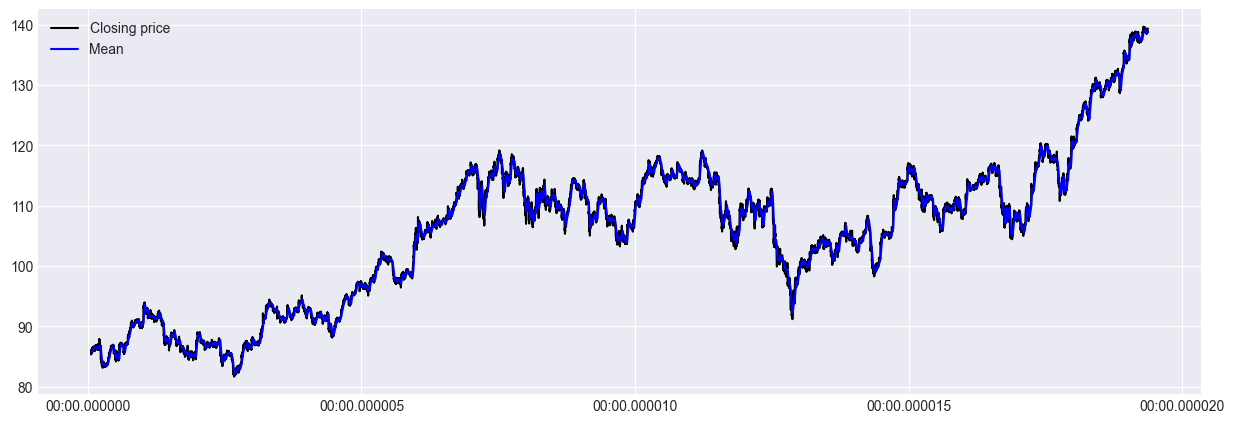

In [26]:
mean = data['close'].rolling(window = int(6.5*4)).mean()
std = data['close'].rolling(window = int(6.5*4)).std()

print(std)

plt.figure(figsize = (15,5))

plt.plot(data.close, color ='black', label = 'Closing price')
plt.plot(mean, color ='blue', label ='Mean')
plt.legend(loc = 'best')
plt.show(block = 'False')

In [27]:
## making copy of  x

x_copy = x.copy()
x_copy.head()

,open,high,low,close,pct_change_15,pct_change_45,pct_change_75,rsi,adx,sma,corr,volatility,volatility2
1970-01-01 00:00:00.000000056,86.37,86.38,86.03,86.08,-0.003358,-0.006119,-0.009322,34.415816,12.622385,86.771923,0.073429,0.122080,0.444131
1970-01-01 00:00:00.000000057,86.07,86.08,85.72,85.87,-0.002440,-0.006134,-0.011625,31.956063,13.758180,86.746538,-0.071707,0.128145,0.453945
1970-01-01 00:00:00.000000058,85.88,86.07,85.56,85.62,-0.002911,-0.008684,-0.011431,29.358195,14.970549,86.708077,-0.111534,0.134945,0.466647
1970-01-01 00:00:00.000000059,85.62,85.76,85.56,85.72,0.001168,-0.004182,-0.007870,31.669060,16.136288,86.672692,-0.101032,0.138040,0.467204
1970-01-01 00:00:00.000000060,85.73,86.35,85.25,85.33,-0.004550,-0.006289,-0.012041,27.959367,16.266239,86.617308,0.016531,0.154560,0.468877


# Stationarity check

In [29]:
## Using Add Fuller Method (ADF) to check the stationarity;

from statsmodels.tsa.stattools import adfuller as ADF

## defing the function to perform adf check:

def is_stationary(series):
    result = ADF(series)
    if (result[1] < 0.05):
        return True
    else:
        return False

## Removing non Stationary columns

In [31]:
for col in x.columns:
    if(not(is_stationary(x[col]))):
        print(f'Column {col} is not stationary, dropping it')
        x.drop(columns = [col], axis =1, inplace = True, errors = 'ignore')
    else:
        print(f'Column {col} is stationary, keeping it')


Column open is not stationary, dropping it
Column high is not stationary, dropping it
Column low is not stationary, dropping it
Column close is not stationary, dropping it
Column pct_change_15 is stationary, keeping it
Column pct_change_45 is stationary, keeping it
Column pct_change_75 is stationary, keeping it
Column rsi is stationary, keeping it
Column adx is stationary, keeping it
Column sma is not stationary, dropping it
Column corr is stationary, keeping it
Column volatility is stationary, keeping it
Column volatility2 is stationary, keeping it


# Checking for correlation between features

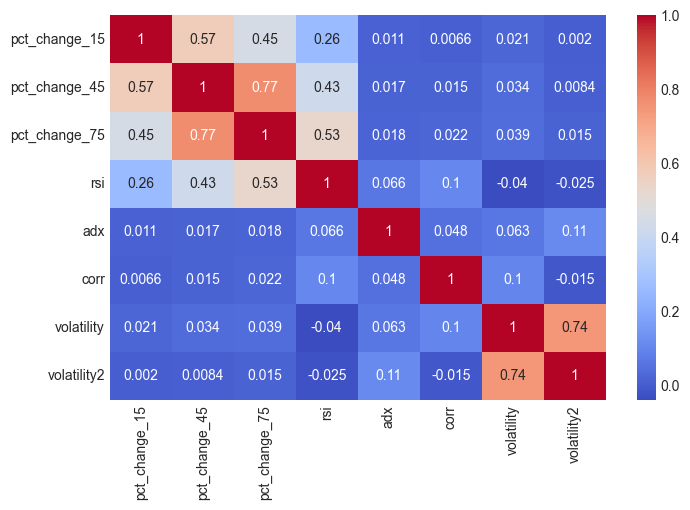

In [33]:
import seaborn as sns

plt.figure(figsize= (8,5))

sns.heatmap(x.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [34]:
c = x.corr()
type(c)


pandas.core.frame.DataFrame

# Dropping highly correlated values

In [36]:
## Function to get the highly correlated columns
def get_pairs_above_threshold(x, thresh):
    correl = x.corr()
    correl = correl.abs()
    pairs_to_drop = set() ##creating an empty set for storing the pairs to drop:
    for row in range(correl.shape[0]):
        for col in range(correl.shape[1]):
            if(correl.iloc[row,col] > thresh):
                if(row != col):
                    pair = tuple(sorted((correl.columns[row], correl.columns[col])))
                    pairs_to_drop.add(pair)
    return pairs_to_drop


In [37]:
pairs = get_pairs_above_threshold(x,0.7)
print(pairs)

{('pct_change_45', 'pct_change_75'), ('volatility', 'volatility2')}


In [38]:
x.drop(columns = ['volatility2'], inplace = True, errors = 'ignore')

print("Final input features for our model :")
print(list(x.columns))

Final input features for our model :
['pct_change_15', 'pct_change_45', 'pct_change_75', 'rsi', 'adx', 'corr', 'volatility']


## Training and Testing data split

In [40]:
from sklearn.model_selection import train_test_split as TTS

x_train, x_test, y_train, y_test = TTS(x,y, train_size = .80, random_state = 73, shuffle = False)
# print(x.shape)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(15451, 7)
(15451,)
(3863, 7)
(3863,)


# Visualizing Training and Testing Datasets

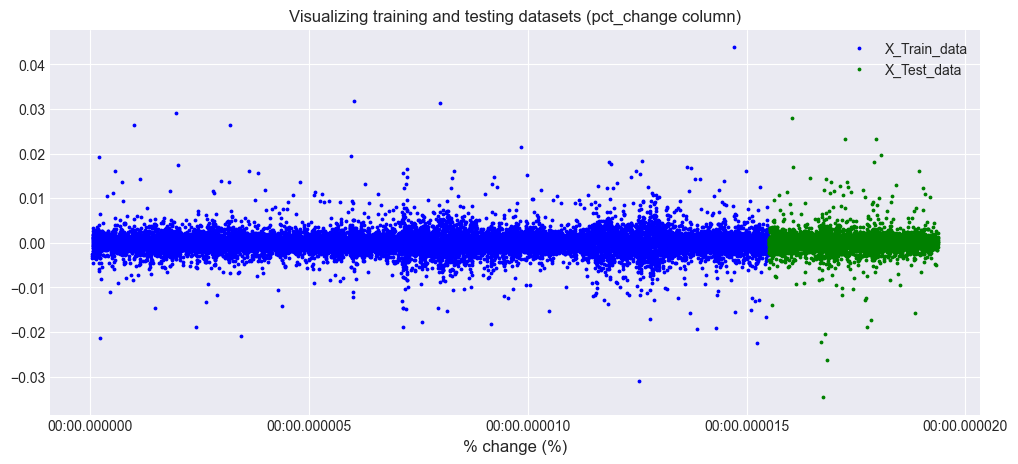

(15451, 7)
(15451,)
(3863, 7)
(3863,)


In [42]:
plt.figure(figsize = (12,5))

plt.plot(x_train['pct_change_15'], linestyle = 'None', marker = '.', markersize = 3.5, color= 'blue', label= 'X_Train_data')
        
plt.plot(x_test['pct_change_15'], linestyle = 'None', marker = '.', markersize = 3.5, color= 'green',label= 'X_Test_data')

plt.title('Visualizing training and testing datasets (pct_change column)')
plt.xlabel('Years' , fontsize = 12)
plt.xlabel('% change (%)' , fontsize = 12)

plt.legend()
plt.show()

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

In [43]:
print(x_train.head(10))

                               pct_change_15  pct_change_45  pct_change_75  \
1970-01-01 00:00:00.000000056      -0.003358      -0.006119      -0.009322   
1970-01-01 00:00:00.000000057      -0.002440      -0.006134      -0.011625   
1970-01-01 00:00:00.000000058      -0.002911      -0.008684      -0.011431   
1970-01-01 00:00:00.000000059       0.001168      -0.004182      -0.007870   
1970-01-01 00:00:00.000000060      -0.004550      -0.006289      -0.012041   
1970-01-01 00:00:00.000000061       0.001758      -0.001635      -0.006970   
1970-01-01 00:00:00.000000062       0.001638      -0.001167      -0.002911   
1970-01-01 00:00:00.000000063       0.000467       0.003867       0.000467   
1970-01-01 00:00:00.000000064      -0.001868       0.000234      -0.002566   
1970-01-01 00:00:00.000000065       0.000936      -0.000467       0.002930   

                                     rsi        adx      corr  volatility  
1970-01-01 00:00:00.000000056  34.415816  12.622385  0.073429    

## Data Scaling

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
# scaler2 = MinMaxScaler()


# x_train[['rsi','adx']] = scaler2.fit_transform(x_train[['rsi','adx']])

# x_test[['rsi','adx']] = scaler2.transform(x_test[['rsi','adx']])

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_train.columns)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(15451, 7)
(15451,)
(3863, 7)
(3863,)


# Creating the Model to predict buy/sell signals

In [47]:
## Importing metrices library

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, classification_report as cl_report, confusion_matrix as CM

## Logistic Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression as LR

model_lr = LR(random_state =73)

model_lr.fit(x_train_scaled, y_train)

y_pred_lr = model_lr.predict(x_test_scaled)

print(accuracy_score(y_test,y_pred_lr)*100)

50.58244887393217


In [50]:
result = cl_report(y_test,y_pred_lr)
print(result)

              precision    recall  f1-score   support

           0       0.50      0.77      0.61      1936
           1       0.51      0.24      0.33      1927

    accuracy                           0.51      3863
   macro avg       0.51      0.51      0.47      3863
weighted avg       0.51      0.51      0.47      3863



In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(15451, 7)
(15451,)
(3863, 7)
(3863,)


## Random forest model

In [53]:
model = RFC(
    n_estimators = 200, max_features = 5,
    max_depth = 4, random_state = 73, class_weight='balanced'
)

# Training the Model

In [55]:
model.fit(x_train,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=200, random_state=73)

## Function to set threshold for predicted vaues

In [57]:

def pred_manually(x_test, model):
    pred = model.predict_proba(x_test)
    pred = np.where(pred[:,1] > 0.488 , 1,0)
    return pred

## Predicting Data

In [59]:

y_pred = model.predict(x_test)       ## prediction using default model

y_pred_man = pred_manually(x_test,model)   ## prediction using threshold based user defined model

y_expected = list(y_test)

print(y_expected[:20], y_pred[:20])


[1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0] [0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0]


In [60]:


accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 52.55%


In [61]:
report_cl = cl_report(y_test.values, y_pred ,output_dict = True)

report_cm = CM(y_test, y_pred)

print(cl_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.64      0.58      1936
           1       0.53      0.41      0.46      1927

    accuracy                           0.53      3863
   macro avg       0.53      0.53      0.52      3863
weighted avg       0.53      0.53      0.52      3863



## Heatmap of Classificatoin Report

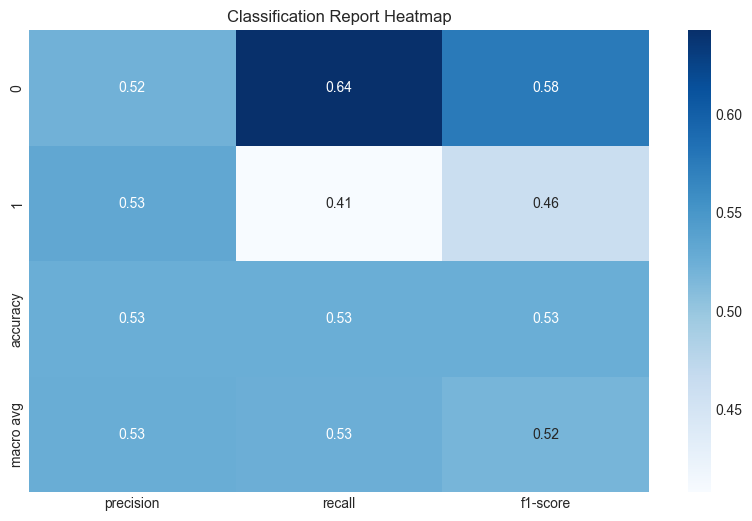

In [63]:
report_cl = pd.DataFrame(report_cl).transpose()

# Now you can plot it with sns.heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_cl.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f')
plt.title("Classification Report Heatmap")
plt.show()

## Heatmap of Confusion Matrix

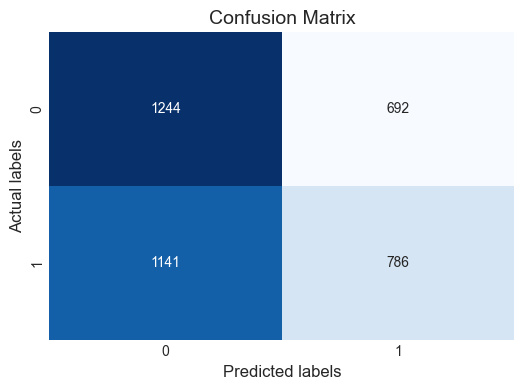

In [65]:
import matplotlib.colors as clrs

fig, ax = plt.subplots(figsize = (6,4))

sns.heatmap(report_cm, fmt = 'd', cmap = 'Blues', cbar = False, annot = True, ax=ax)

ax.set_xlabel('Predicted labels', fontsize= 12)
ax.set_ylabel('Actual labels', fontsize= 12)
ax.set_title('Confusion Matrix', fontsize= 14)
plt.show()

## Backtesting 

In [67]:
strategy = pd.DataFrame()    ## creating a new dataframe called strategy

x_train, x_test, y_train, y_test = TTS(x_copy,y, train_size = .80, random_state = 73, shuffle = False)

strategy['close'] = x_test['close'].copy()
strategy['predicted_signal'] = y_pred

strategy.head(15)

,close,predicted_signal
1970-01-01 00:00:00.000015507,109.33,0
1970-01-01 00:00:00.000015508,109.37,0
1970-01-01 00:00:00.000015509,109.38,0
1970-01-01 00:00:00.000015510,109.37,0
1970-01-01 00:00:00.000015511,109.36,0
1970-01-01 00:00:00.000015512,109.43,0
1970-01-01 00:00:00.000015513,109.51,0
1970-01-01 00:00:00.000015514,109.28,0
1970-01-01 00:00:00.000015515,109.15,1
1970-01-01 00:00:00.000015516,108.99,1


In [68]:
strategy['pct_change'] = strategy['close'].pct_change()

strategy['returns'] = strategy['predicted_signal'].shift(1)*strategy['pct_change']

strategy.dropna(inplace = True)
strategy.shape

strategy['returns'].head(15)

1970-01-01 00:00:00.000015508    0.000000
1970-01-01 00:00:00.000015509    0.000000
1970-01-01 00:00:00.000015510   -0.000000
1970-01-01 00:00:00.000015511   -0.000000
1970-01-01 00:00:00.000015512    0.000000
1970-01-01 00:00:00.000015513    0.000000
1970-01-01 00:00:00.000015514   -0.000000
1970-01-01 00:00:00.000015515   -0.000000
1970-01-01 00:00:00.000015516   -0.001466
1970-01-01 00:00:00.000015517    0.000734
1970-01-01 00:00:00.000015518   -0.000458
1970-01-01 00:00:00.000015519    0.000642
1970-01-01 00:00:00.000015520   -0.000000
1970-01-01 00:00:00.000015521   -0.002209
1970-01-01 00:00:00.000015522   -0.005626
Name: returns, dtype: float64

## Function to get trade logs.
Function will take dataframe with signals and close price and return data like trade direction, entry time, entry price, exit time, exit price and profit or loss

In [70]:
def get_logs(data, close, signal):
    trades = pd.DataFrame()  # creating a new dataframe
    curr_pos = 0
    entry_time = None

    for i in data.index:
        new_pos = data.loc[i, signal]  # Use loc to access rows by index
        # If the position changes, record entry and exit
        if new_pos != curr_pos:
            if entry_time is not None:  # There was an open position
                entry_price = data.loc[entry_time, close]
                exit_time = i
                exit_price = data.loc[exit_time, close]
                
                # Log the trade
                trade_details = pd.DataFrame([(curr_pos, entry_time, entry_price, exit_time, exit_price)])
                trades = pd.concat([trades, trade_details], ignore_index=True)

                entry_time = None  # Reset entry time after trade logging

            # If the new position is non-zero, update entry time and current position
            if new_pos != 0:
                entry_time = i
            curr_pos = new_pos

    # Assign columns to the DataFrame
    trades.columns = ['Position', 'Entry time', 'Entry price', 'Exit time', 'Exit price']
    
    # Calculate Profit and Loss
    trades['PnL'] = (trades['Exit price'] - trades['Entry price']) * trades['Position']

    return trades


In [71]:
trade_log = get_logs(strategy, 'close','predicted_signal')
trade_log.PnL.sum()

np.float64(30.79499999999966)

In [72]:
i = strategy.index[2]

strategy

,close,predicted_signal,pct_change,returns
1970-01-01 00:00:00.000015508,109.370,0,0.000366,0.000000
1970-01-01 00:00:00.000015509,109.380,0,0.000091,0.000000
1970-01-01 00:00:00.000015510,109.370,0,-0.000091,-0.000000
1970-01-01 00:00:00.000015511,109.360,0,-0.000091,-0.000000
1970-01-01 00:00:00.000015512,109.430,0,0.000640,0.000000
...,...,...,...,...
1970-01-01 00:00:00.000019365,138.755,1,0.000108,0.000108
1970-01-01 00:00:00.000019366,138.775,0,0.000144,0.000144
1970-01-01 00:00:00.000019367,138.910,1,0.000973,0.000000
1970-01-01 00:00:00.000019368,139.200,1,0.002088,0.002088


## Function to get trade level analytics
This functoin will take the trade log that we generated in previous step and return important trade analytics data

In [74]:
def get_analytics(trades):
    # Creating a dictionary to store the parameters
    analytics = {}

    # Number of long trades
    analytics['num_of_long'] = len(trades.loc[trades.Position == 1])

    # Number of short trades
    analytics['num_of_short'] = len(trades.loc[trades.Position == -1])

    # Total number of trades
    analytics['total_trades'] = analytics['num_of_long'] + analytics['num_of_short']

    # Gross Profit
    analytics['gross_profit'] = trades.loc[trades.PnL > 0, 'PnL'].sum()

    # Gross Loss
    analytics['gross_loss'] = trades.loc[trades.PnL < 0, 'PnL'].sum()

    # Net Profit
    analytics['net_profit'] = trades['PnL'].sum()  # Net profit is sum of all PnL

    # Profit-making trades
    analytics['winners'] = len(trades.loc[trades.PnL > 0])

    # Loss-making trades
    analytics['losers'] = len(trades.loc[trades.PnL <= 0])

    ## Handle the case where no trades exist
    if analytics['total_trades'] > 0:
        # Win percentage
        analytics['win_percentage'] =(analytics['winners']/ analytics['total_trades'])* 100

        # Loss percentage
        analytics['loss_percentage'] =(analytics['losers']/ analytics['total_trades'])* 100
    else:
        analytics['win_percentage'] = 0
        analytics['loss_percentage'] = 0

    # Per trade profit/loss for losing trades
    analytics['per_trade_PnL_losers'] = trades.loc[trades.PnL <= 0, 'PnL'].mean()

    # Per trade profit/loss for winning trades
    analytics['per_trade_PnL_winners'] = trades.loc[trades.PnL > 0, 'PnL'].mean()

    # Convert the dictionary to a DataFrame
    analytics_df = pd.DataFrame([analytics])

    # Rounding to 2 decimal places
    analytics_df = analytics_df.round(2)

    return analytics_df.T


In [75]:
trades_analytics = get_analytics(trade_log)

trades_analytics

,0
num_of_long,594.00
num_of_short,0.00
total_trades,594.00
gross_profit,85.66
gross_loss,-54.86
net_profit,30.79
winners,369.00
losers,225.00
win_percentage,62.12
loss_percentage,37.88


## Calculating the Cumulative returns

In [77]:
strategy['cumulative_returns'] = (1 + strategy.returns).cumprod()

strategy

,close,predicted_signal,pct_change,returns,cumulative_returns
1970-01-01 00:00:00.000015508,109.370,0,0.000366,0.000000,1.000000
1970-01-01 00:00:00.000015509,109.380,0,0.000091,0.000000,1.000000
1970-01-01 00:00:00.000015510,109.370,0,-0.000091,-0.000000,1.000000
1970-01-01 00:00:00.000015511,109.360,0,-0.000091,-0.000000,1.000000
1970-01-01 00:00:00.000015512,109.430,0,0.000640,0.000000,1.000000
...,...,...,...,...,...
1970-01-01 00:00:00.000019365,138.755,1,0.000108,0.000108,1.291696
1970-01-01 00:00:00.000019366,138.775,0,0.000144,0.000144,1.291882
1970-01-01 00:00:00.000019367,138.910,1,0.000973,0.000000,1.291882
1970-01-01 00:00:00.000019368,139.200,1,0.002088,0.002088,1.294579


# Plotting the curve of cummuative return (Equity Curve)

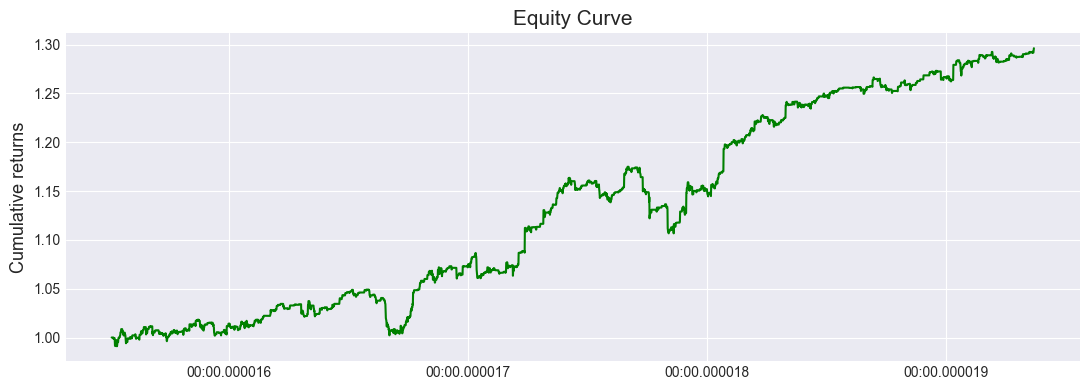

The cumulative return is 29.63%


In [79]:
plt.figure(figsize=(11,4))

plt.plot(pd.to_datetime(strategy.index), strategy['cumulative_returns'], color = 'green')

plt.title('Equity Curve',fontsize = 15)
plt.ylabel('Cumulative returns', fontsize = 13)
plt.tight_layout()
plt.show()

cumulative_return = (strategy['cumulative_returns'].iloc[-1] - 1)*100
print(f'The cumulative return is {cumulative_return:.2f}%')

# Annualised Returns

In [81]:
 annual_return = (   ((strategy.cumulative_returns.iloc[-1])**(252*6.5*4/strategy.shape[0]))   -1 )* 100

print(f'Annual Return is {annual_return:.2f}%')

Annual Return is 55.32%
